# ASTRO 533 - Project 1

**Created:** Sep. 2020   
**Last Edit:** Sep. 2020  

**Author:** Bill Chen  
**Email:** ybchen@umich.edu  

*Note: some codes are borrowed from Eric*

## Load packages and read data

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.table import Table as tb
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Anglesfrom astropy.coordinates 
import astropy.units as u
plt.style.use('bill')

gaiarv_cat = tb.read('../glt13.fits', format='fits')
gaiarv_cat_m22 = tb.read('./glt19_m22.fits', format='fits')

## Find Pleiades

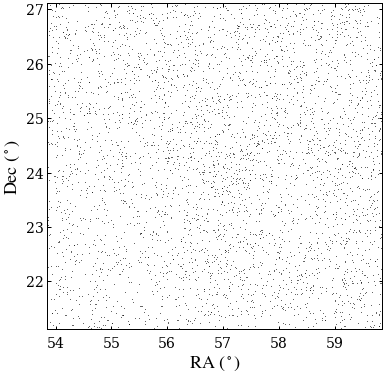

In [2]:
# find Pleiades in RA-Dec space

%matplotlib inline
fig, ax = plt.subplots(figsize=(6,6))

m45ra = 15 * (3 + (47/60) + (24/3600)) # RA = 3h 47m 24s
m45dec = 24 + (7/60) + (0/3600) # Dec = 24deg 7min 0sec
candidates, = np.where((abs(gaiarv_cat['ra']-m45ra) < 3) & (abs(gaiarv_cat['dec']-m45dec) < 3))

ax.plot(gaiarv_cat['ra'][candidates], gaiarv_cat['dec'][candidates], 'k,', alpha=0.6)

ax.set_xlabel(r'$\mathrm{RA}\ \mathrm{(^\circ)}$')
ax.set_ylabel(r'$\mathrm{Dec}\ \mathrm{(^\circ)}$')
ax.set_xlim(m45ra-3, m45ra+3)
ax.set_ylim(m45dec-3, m45dec+3)

plt.show()

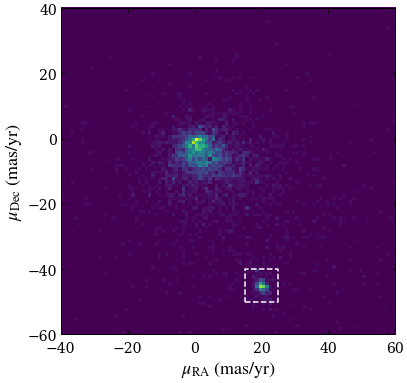

In [3]:
# find Pleiades in proper motion space

fig, ax = plt.subplots(figsize=(6,6))

candidates, = np.where((abs(gaiarv_cat['ra']-m45ra) < 3) & (abs(gaiarv_cat['dec']-m45dec) < 3))

# ax.plot(gaiarv_cat['pmra'][candidates], gaiarv_cat['pmdec'][candidates], 'k,', alpha=0.6)
ax.hist2d(gaiarv_cat['pmra'][candidates], gaiarv_cat['pmdec'][candidates], bins=100, range=[[-40, 60], [-60, 40]])
ax.plot([15,25,25,15,15], [-50,-50,-40,-40,-50], 'w--') # draw a box indicating the selection criteria

ax.set_xlabel(r'$\mu_\mathrm{RA}\ \mathrm{(mas/yr)}$')
ax.set_ylabel(r'$\mu_\mathrm{Dec}\ \mathrm{(mas/yr)}$')
ax.set_xlim(-40, 60)
ax.set_ylim(-60, 40)

plt.show()

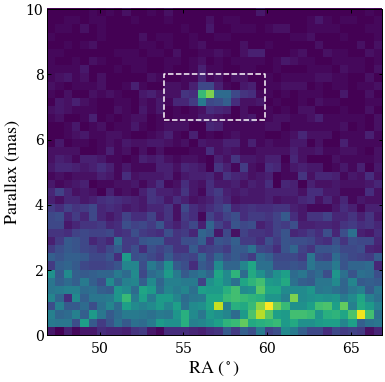

In [4]:
# find Pleiades in RA-parallax space

fig, ax = plt.subplots(figsize=(6,6))

candidates, = np.where((abs(gaiarv_cat['ra']-m45ra) < 10) & (abs(gaiarv_cat['dec']-m45dec) < 3))

# ax.plot(gaiarv_cat['ra'][candidates], gaiarv_cat['parallax'][candidates], 'k,', alpha=0.6)
ax.hist2d(gaiarv_cat['ra'][candidates], gaiarv_cat['parallax'][candidates], bins=40, range=[[m45ra-10, m45ra+10], [0, 10]])
ax.plot([m45ra-3,m45ra+3,m45ra+3,m45ra-3,m45ra-3], [6.6,6.6,8,8,6.6], 'w--') # draw a box indicating the selection criteria


ax.set_xlabel(r'$\mathrm{RA}\ \mathrm{(^\circ)}$')
ax.set_ylabel(r'$\mathrm{Parallax}\ \mathrm{(mas)}$')
ax.set_xlim(m45ra-10, m45ra+10)
ax.set_ylim(0, 10)

plt.show()

In [13]:
# final selection criteria

m45_index, = np.where((abs(gaiarv_cat['ra']-m45ra) < 3) & (abs(gaiarv_cat['dec']-m45dec) < 3) &
                       (abs(gaiarv_cat['pmra']-20) < 5) & (abs(gaiarv_cat['pmdec']+45) < 5) &
                       (abs(gaiarv_cat['parallax']-7.3) < 0.7))
print('Number of candidates:', len(m45_index))

Number of candidates: 250


In [12]:
# distance estimation

d_estimate = 1000 / (gaiarv_cat['parallax'][m45_index]) # pc
print('Estimation of mean distance (in pc):', np.mean(d_estimate))

Estimation of mean distance (in pc): 136.49794481021672


## Color-magnitude diagrams of Pleiades

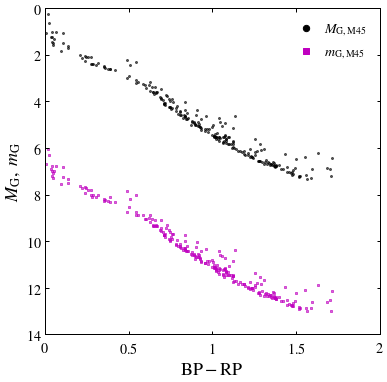

In [7]:
fig, ax = plt.subplots(figsize=(6,6))

absmag = gaiarv_cat['phot_g_mean_mag'][m45_index] - 5*np.log10(d_estimate/10) # absolute magnitude

ax.scatter(gaiarv_cat['bp_rp'][m45_index], absmag, c='k', s=4, alpha=0.6, label=None)
ax.scatter(gaiarv_cat['bp_rp'][m45_index], gaiarv_cat['phot_g_mean_mag'][m45_index], marker='s', c='m', s=4, alpha=0.6,
           label=None)

ax.set_xlabel(r'$\mathrm{BP-RP}$')
ax.set_ylabel(r'$M_\mathrm{G},\ m_\mathrm{G}$')
ax.set_xlim(0, 2)
ax.set_ylim(14, 0)
ax.set_xticks([0, 0.5, 1, 1.5, 2])
ax.set_xticklabels([r'$0$', r'$0.5$', r'$1$', r'$1.5$', r'$2$'])
ax.set_yticks([0, 2, 4, 6, 8, 10, 12, 14])
ax.set_yticklabels([r'$0$', r'$2$', r'$4$', r'$6$', r'$8$', r'$10$', r'$12$', r'$14$'])

ax.scatter([], [], c='k', s=40, label=r'$M_\mathrm{G,M45}$')
ax.scatter([], [], marker='s', c='m', s=40, label=r'$m_\mathrm{G,M45}$')
plt.legend()

plt.savefig('./figures/color-M_m45.pdf')
plt.show()

## Find M22

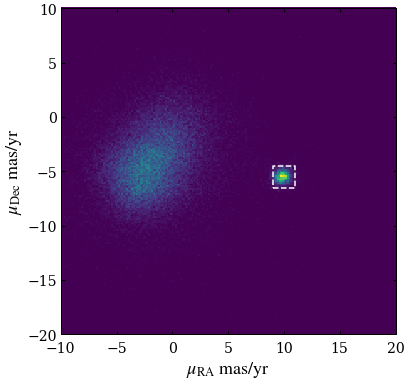

In [8]:
# find M22 in proper motion space

fig, ax = plt.subplots(figsize=(6,6))

# ax.plot(gaiarv_cat['pmra'], gaiarv_cat['pmdec'], 'k,', alpha=0.6)
ax.hist2d(gaiarv_cat_m22['pmra'], gaiarv_cat_m22['pmdec'], bins=200, range=[[-10, 20], [-20, 10]])
ax.plot([9,11,11,9,9], [-6.5,-6.5,-4.5,-4.5,-6.5], 'w--') # draw a box indicating the selection criteria

ax.set_xlabel(r'$\mu_\mathrm{RA}\ \mathrm{mas/yr}$')
ax.set_ylabel(r'$\mu_\mathrm{Dec}\ \mathrm{mas/yr}$')
ax.set_xlim(-10, 20)
ax.set_ylim(-20, 10)

plt.show()

In [9]:
# final selection criteria

m22_index, = np.where((abs(gaiarv_cat_m22['pmra']-10) < 1) & (abs(gaiarv_cat_m22['pmdec']+5.5) < 1))
print('Number of candidates:', len(m22_index))

Number of candidates: 4103


## Color-magnitude diagrams of M22

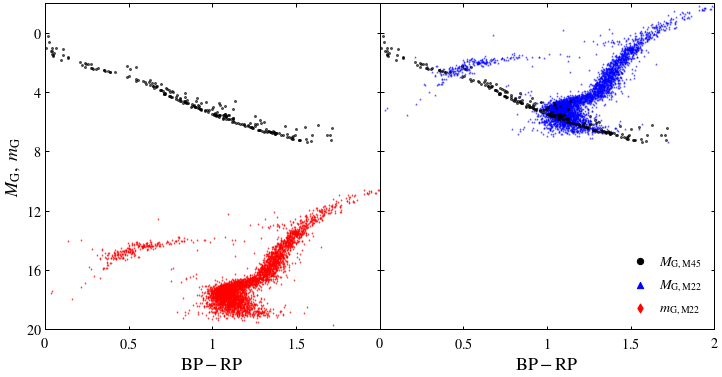

In [10]:
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(12,6),sharey=True)
fig.subplots_adjust(wspace=0)

d_guess = 3 # kpc
absmag_m22 = gaiarv_cat_m22['phot_g_mean_mag'][m22_index] - 5*np.log10(d_guess*1000/10) # absolute magnitude

ax1.scatter(gaiarv_cat_m22['bp_rp'][m22_index], gaiarv_cat_m22['phot_g_mean_mag'][m22_index], marker='d', c='r', s=1, 
            alpha=0.6, label=None)
ax1.scatter(gaiarv_cat['bp_rp'][m45_index], absmag, c='k', s=4, alpha=0.6, label=None)

ax1.set_xlabel(r'$\mathrm{BP-RP}$')
ax1.set_ylabel(r'$M_\mathrm{G},\ m_\mathrm{G}$')
ax1.set_xlim(0, 2)
ax1.set_ylim(20, -2)
ax1.set_xticks([0, 0.5, 1, 1.5])
ax1.set_xticklabels([r'$0$', r'$0.5$', r'$1$', r'$1.5$'])
ax1.set_yticks([0, 4, 8, 12, 16, 20])
ax1.set_yticklabels([r'$0$', r'$4$', r'$8$', r'$12$', r'$16$', r'$20$'])

ax2.scatter(gaiarv_cat_m22['bp_rp'][m22_index], absmag_m22, marker='^', c='b', s=1, alpha=0.6, label=None)
ax2.scatter(gaiarv_cat['bp_rp'][m45_index], absmag, c='k', s=4, alpha=0.6, label=None)

ax2.set_xlabel(r'$\mathrm{BP-RP}$')
ax2.set_xlim(0, 2)
ax2.set_xticks([0, 0.5, 1, 1.5, 2])
ax2.set_xticklabels([r'$0$', r'$0.5$', r'$1$', r'$1.5$', r'$2$'])

ax2.scatter([], [], c='k', s=40, label=r'$M_\mathrm{G,M45}$')
ax2.scatter([], [], marker='^', c='b', s=40, label=r'$M_\mathrm{G,M22}$')
ax2.scatter([], [], marker='d', c='r', s=40, label=r'$m_\mathrm{G,M22}$')
ax2.legend(loc=4)

plt.savefig('./figures/color-M_m22.pdf')
plt.show()

## Comparison to other works

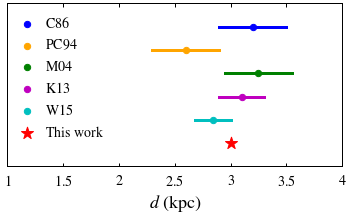

In [14]:
fig, ax = plt.subplots(figsize=(6,3))

d = np.zeros(5)
e = np.zeros(5)
colors = ['b', 'orange', 'g', 'm', 'c']
labels = [r'$\rm C86$', r'$\rm PC94$', r'$\rm M04$', r'$\rm K13$', r'$\rm W15$']

# Cudworth 1986
d[0] = 3.2 # kpc (and below)
e[0] = 0.3

# Peterson & Cudworth 1994
d[1] = 2.6
e[1] = 0.3

# Monaco et al. 2004
d[2] = 3.25
e[2] = 0.3

# Kunder et al. 2013
d[3] = 3.1
e[3] = 0.2

# Watkins et al. 2015
d[4] = 2.84
e[4] = 0.16

for i in range(5):
    ax.scatter(d[i], i+1, c=colors[i], s=40, label=labels[i])
    ax.plot([d[i]-e[i],d[i]+e[i]], [i+1, i+1], c=colors[i], lw=3, label=None)

ax.scatter(d_guess, 6, c='r', s=160, marker='*', label=r'$\rm This\ work$')

ax.set_xlabel(r'$d\ \mathrm{(kpc)}$')
ax.set_xlim(1, 4)
ax.set_ylim(7, 0)
ax.set_xticks([1, 1.5, 2, 2.5, 3, 3.5, 4])
ax.set_xticklabels([r'$1$', r'$1.5$', r'$2$', r'$2.5$', r'$3$', r'$3.5$', r'$4$'])
ax.set_yticks([])
ax.set_yticklabels([])
ax.legend()

plt.savefig('./figures/other_works.pdf')
plt.show()